<a href="https://colab.research.google.com/github/gojiteji/shinkan/blob/master/%E6%96%B0%E6%AD%93%E7%94%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 札幌市のホームページから札幌市のcovid19感染データをダウンロード

`! [コマンド]`は、実行中の端末でUnixコマンドを実行します。何もない場合はPythonが実行されます。

`wget`: URLのファイルをダウンロードするコマンド

In [ ]:
!wget https://ckan.pf-sapporo.jp/dataset/c89f65e7-45a8-4ab2-b94d-494ae192c70f/resource/7dc6b374-ac73-4df4-b899-ea6c8cac3e32/download/covid19datasapporo.csv

--2021-03-22 15:03:31--  https://ckan.pf-sapporo.jp/dataset/c89f65e7-45a8-4ab2-b94d-494ae192c70f/resource/7dc6b374-ac73-4df4-b899-ea6c8cac3e32/download/covid19datasapporo.csv
Resolving ckan.pf-sapporo.jp (ckan.pf-sapporo.jp)... 153.153.156.53, 153.153.156.52
Connecting to ckan.pf-sapporo.jp (ckan.pf-sapporo.jp)|153.153.156.53|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20899 (20K) [text/csv]
Saving to: ‘covid19datasapporo.csv’

covid19datasapporo. 100%[===================>]  20.41K  --.-KB/s    in 0s      

2021-03-22 15:03:32 (208 MB/s) - ‘covid19datasapporo.csv’ saved [20899/20899]



In [ ]:
#ライブラリのインポート
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## データ読み込み
デジタルオシロスコープなどで計測した実験データはcsvファイルで取得される場合が多いです。

データ整形には今回はpandasを使います。numpyなどを用いる方法もありますので興味のある方はググってみましょう。

In [ ]:
#データ読み込み
data_set = pd.read_csv("covid19datasapporo.csv")

In [ ]:
#データの一部を表示
data_set

,日付,日陽性数,陽性累計,日患者数,患者累計,日死亡数,死亡累計,日治療終了数,治療終了累計
0,2020-02-14T08:00:00.000Z,1,1,1,1,0,0,0,0
1,2020-02-15T08:00:00.000Z,0,1,0,1,0,0,0,0
2,2020-02-16T08:00:00.000Z,0,1,0,1,0,0,0,0
3,2020-02-17T08:00:00.000Z,0,1,0,1,0,0,0,0
4,2020-02-18T08:00:00.000Z,1,2,1,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...
397,2021-03-17T08:00:00.000Z,38,11838,-22,250,1,316,59,11272
398,2021-03-18T08:00:00.000Z,65,11903,56,306,0,316,9,11281
399,2021-03-19T08:00:00.000Z,47,11950,30,336,1,317,16,11297
400,2021-03-20T08:00:00.000Z,29,11979,16,352,2,319,11,11308


## pandasクラスのいじり方
そのほかの操作方法はgoogleで`pandas {実行したいこと}`などと検索しましょう

In [ ]:
#任意の列を抽出
data_set["日陽性数"]

0       1
1       0
2       0
3       0
4       1
       ..
397    38
398    65
399    47
400    29
401    39
Name: 日陽性数, Length: 402, dtype: int64

In [ ]:
#1行目から4 行目を抽出(Pythonによる配列操作)
data_set[1:4]

,日付,日陽性数,陽性累計,日患者数,患者累計,日死亡数,死亡累計,日治療終了数,治療終了累計
1,2020-02-15T08:00:00.000Z,0,1,0,1,0,0,0,0
2,2020-02-16T08:00:00.000Z,0,1,0,1,0,0,0,0
3,2020-02-17T08:00:00.000Z,0,1,0,1,0,0,0,0


In [ ]:
#マイナスをつけると後ろからの要素を指定できます。
data_set[-10:]

,日付,日陽性数,陽性累計,日患者数,患者累計,日死亡数,死亡累計,日治療終了数,治療終了累計
392,2021-03-12T08:00:00.000Z,16,11687,-11,288,0,313,26,11085
393,2021-03-13T08:00:00.000Z,25,11712,25,313,0,313,0,11085
394,2021-03-14T08:00:00.000Z,28,11740,-19,294,0,313,47,11132
395,2021-03-15T08:00:00.000Z,32,11772,10,304,1,314,22,11154
396,2021-03-16T08:00:00.000Z,28,11800,-32,272,1,315,59,11213
397,2021-03-17T08:00:00.000Z,38,11838,-22,250,1,316,59,11272
398,2021-03-18T08:00:00.000Z,65,11903,56,306,0,316,9,11281
399,2021-03-19T08:00:00.000Z,47,11950,30,336,1,317,16,11297
400,2021-03-20T08:00:00.000Z,29,11979,16,352,2,319,11,11308
401,2021-03-21T08:00:00.000Z,39,12018,26,378,1,320,12,11320


## 表を描く
実験レポートに表はつきものです(電圧・電流・秒速etc)。やってみましょう！

Pythonの文法

```Python
#コメントアウト

x=1.0 #xに1を代入

#和差積商
z=x+y
z=x-y
z=x*y
z=x/y


#配列
[1,2,3,4]

#numpyを使った配列
np.array([1,2,3,4])

#範囲を指定したnumpy配列
np.array(list(range(100)))
```

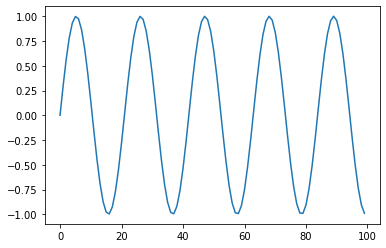

In [ ]:
# グラフのサンプルコード
#こういうデータがあったとすると
x=np.array(list(range(100)))
y_1=np.sin(0.3*x)
y_2=np.cos(0.3*x)*np.exp(-0.03*x)

#matplotlibを使ってこうやって描ける
plt.plot(x,y_1)
plt.show()

## グラフに必要な情報を追記
上の情報だけのレポートだと減点もしくは再提出をする羽目になります。必要な情報を追記しましょう。

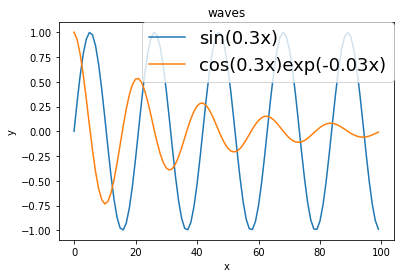

In [ ]:
plt.title("waves")
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y_1,label="sin(0.3x)")
plt.plot(x,y_2,label="cos(0.3x)exp(-0.03x)")

plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=18)
"""
他にもmatplolibでどんなグラフが書けるか調べてみましょう(markerや色、グリッドなど)
"""
plt.show()

## 札幌市のcovid19のデータをグラフ化する
上記までのデータからcovid19のデータのグラフを作成してみましょう。

### 例

- 陽性累計数-1例目の発見からの日数グラフ
- 死亡累計-1例目の発見からの日数グラフ
- 複数データを一枚に表示

### 応用
- 対数グラフで累計表示(`plt.yscale("log")`を使わずに)
- 日感染者数から感染累計のグラフを作成

### Pythonコマンド
配列の内容にから繰り返し処理を加える
```
Sum=0
arr=[1,2,3]
for x in arr:
    Sum=x
print(Sum)
```

指定回数繰り返す
```
counter=0
for x in range(10000):
    counter=counter+1
print(counter)
```
